<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK04_2_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. 데이터 전처리**

- 데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요
- ML 알고리즘은 데이터에 기반하고 있기에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있음
- 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있음
- 결손값, 즉 NaN, Null 값은 허용되지 않음
- 따라서 이러한 Null 값은 고정된 다른 값으로 변환해
야 함
- Null 값을 어떻게 처리해야 할지는 경우에 따라 다름
- 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체 가능
- 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋음
- 가장 결정이 힘든 부분이 Null 값이 일정 수준 이상 되는 경우
- 정확히 몇 퍼센트까지를 일정 수준 이상이라고 한다는 기준은 없지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무 로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야 함
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않기에 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함
- 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미
- 카테고리형 피처 = 코드 값
- 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 게 좋음
- 예를 들어 주민번호나 단순 문자열 아이디와 같은 경우 인코딩하지 않고 삭제하는 게 더 좋음
- 이러한 식별자 피처는 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 예측에 중요한 요소가 될 수 없으며 알고리즘을 오히려 복잡하게 만들고 예측 성능을 떨어뜨리기 때문

**데이터 인코딩**

- 머신러닝을 위한 대표적인 인코딩 방식 = 레이블 인코딩 & 원-핫 인코딩

1. 레이블 인코딩
- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- 예를 들어 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값으로 되어 있다면, TV:1, 냉장고: 2, 전자레인지: 3, 컴퓨터: 4, 선풍기: 5, 믹서: 6과 같은 숫자형 값으로 변환하는 것
- 주의해야할 점은 '01','02'와 같은 코드 값 역시 문자열이므로 1,2와 같은 숫자형 값으로 변환되어야 한다는 것

2. 원-핫 인코딩
- 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

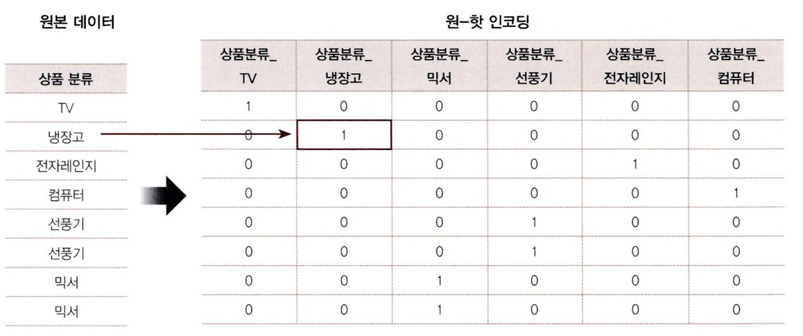

- 먼저 원본 데이터는 8개의 레코드로 돼 있으며, 고유 값은 ['TV', '냉장고', '믹서', '선풍기', '전자레인
지', '컴퓨터']로 모두 6개
- 0부터 5까지 6개의 상품 분류 고유 값에 따라 상품 분류 피처를 6개의 상품 분류 고유 값 피처로 변환
- 즉, TV를 위한 상품 분류_TV, 냉장고를 위한 상품 분류_냉장고, 믹서를 위한 상품 분류_믹서, 선풍기를 위한 상품 분류_선풍기, 전자레인지를 위한 상품 분류_전자레인지, 컴퓨터를 위한 상품 분류_컴퓨터 6개의 피처로 변환하는 것
- 그리고 해당 레코드의 상품 분류가 TV인 경우는 상품 분류_TV 피처에만 1을 입력하고, 나머지 피처는 모두 0
- 마찬가지로 해당 레코드의 상품 분류가 냉장고라면 상품 분류_냉장고 피처에만 1을 입력하고 나머지 피처는 모두 0
- 즉, 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시) 인코딩으로 명명하게 된 것

**레이블 인코딩**

- 사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현
- LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩 수행

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
# 데이터가 많은 경우 문자열 값이 어떤 숫자값으로 인코딩됐는지 직관적으로 알 수 없음
# LabelEncoder 객체의 classes_ 속성값으로 확인
# classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음

print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩 가능

print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


상품 데이터가 상품 분류, 가격 두 개의 속성으로 돼 있을 때 상품 분류를 레이블 인코딩하면 다음과 같이 변환될 수 있음

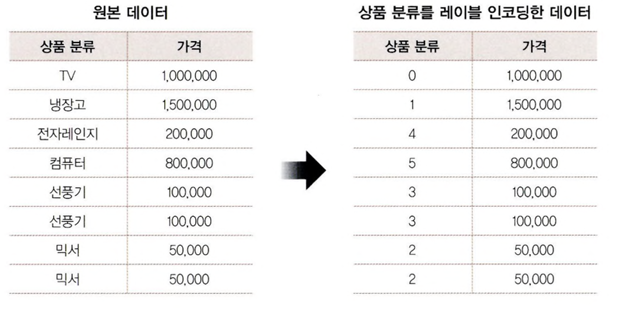

- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음
- 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
- 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여
되거나 더 중요하게 인식할 가능성이 발생
- 하지만 냉장고와 믹서의 숫자 변환 값은 단순 코드이
지 숫자 값에 따른 순서나 중요도로 인식돼서는 안됨
- 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없음

**원-핫 인코딩**

- 원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 변환 가능
- 단, LabelEncoder와 다르게 약간 주의할 점이 있음
- 입력값으로 2차원 데이터가 필요하다는 것과, OneHotEncoder를 이용해 변환한 값이 희소 행렬(대부분이 0인 matrix) 형태이므로 이를 다시 toarray() 메서드를 이용해 밀집 행렬(원소 대부분이 0이 아닌 행렬)로 변환해야 한다는 것
- OneHotEncoder를 이용해 앞의 데이터를 원-핫
인코딩으로 변환

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
# reshape(-1,1) : 열을 1개로 하고, 행 개수는 알아서 정하라는 뜻
items = np.array(items).reshape(-1,1)
print(items)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소 행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print(oh_labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

[['TV']
 ['냉장고']
 ['전자레인지']
 ['컴퓨터']
 ['선풍기']
 ['선풍기']
 ['믹서']
 ['믹서']]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (8, 6)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환됨
- TV가 0, 냉장고 1, 믹서 2, 선풍기 3, 전자레인지 4, 컴퓨터가 5로 인코딩됐으므로 첫 번째 칼럼이 TV, 두 번째 칼럼이 냉장고, 세 번째 칼럼이 믹서, 네 번째 칼럼이 선풍기, 다섯 번째 칼럼이 전자레인지, 여섯 번째 칼럼이 컴퓨터를 나타냄
- 따라서 원본 데이터의 첫 번째 레코드가 TV이므로 변환된 데이터의 첫 번째 레코드의 첫 번째 칼럼이 1이고, 나머지 칼럼은 모두 0이 됨
- 이어서 원본 데이터의 두 번째 레코드가 냉장고이므로 변환된 데이터의 두 번째 레코드의 냉장고에 해당하는 칼럼인 두 번째 칼럼이 1이고, 나머지 칼럼은 모두 0이 됨
- 위 예제 코드의 변환 절차는 다음 그림과 같이 정리할수 있음

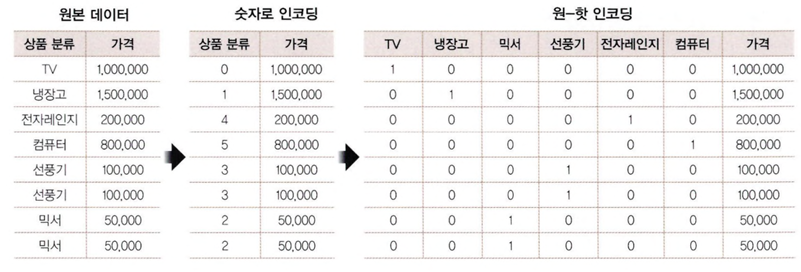

- 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API인 get_dummies()가 제공됨
- 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능

In [ ]:
import pandas as pd

# get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환 가능
df = pd.DataFrame({'item':['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


**피처 스케일링과 정규화**

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 = 피처 스케일링
- 표준화 & 정규화

< 표준화 >
- 데이터의 피처 각각의 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미
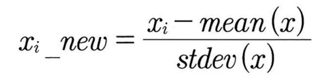

< 정규화 >
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
-  예를 들어 피처 A는 거리를 나타내는 변수로서 값이 0 ~ 100KM로 주어지고 피처 B는 금액을 나타내는 속성
으로 값이 0 ~ 100,000,000,000원으로 주어진다면 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것
- 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것

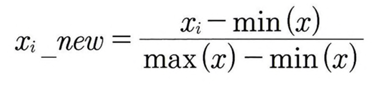

- 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미
- 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠주는 것

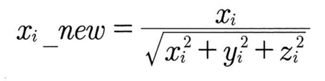

- 혼선 방지를 위해 일반적인 의미이 표준화와 정규화를 피처 스케일링으로, 선형댓 개념의 정규화를 벡터 정규화로 지칭

**StandardScaler**

- StandardScaler는 표준화를 쉽게 지원하기 위한 클래스
- 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요
- 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있음

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환
-  StandardScaler 객체를 생성한 후에 fit()과 transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환됨
-  transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산 값을 다시 확인

In [ ]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환 / fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있음

**MinMaxScaler**

- MinMaxScaler는 데이터값을 0과 1 사이의 범위 값으로 변환 : 정규화
- 음수 값이 있으면 -1 에서 1값으로 변환
- 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 np ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있음

**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

- StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메서드를 이용
- 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환
- fit_transform()은 fit()과 transform()을 한 번에 적용하는 기능을 수행
- 그러나, 학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요
- Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것
- 즉 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있음

아래는 test 데이터에 fit()을 적용할 때 생기는 문제점을 알아볼 수 있는 코드

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

- 학습 데이터인 train_array부터 MinMaxScaler를 이용해 변환
- 학습 데이터는 0부터 10까지 값을 가지는데, 이 데이터에 MinMaxScaler 객체의 fit()을 적용하면 최솟값 0, 최댓값 10이 설정되며 1/10 Scale이 적용됨
- 이제 transform()을 호출하면 1/10 scale로 학습 데이터를 변환하게 되며 원본 데이터 1은 0.1로 2는 0.2, 5는 0.5, 10은 1로 변환됨

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train.array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))  # reshape(-1) : 1차원으로 만듦
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


아래는 fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과

In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5-〉1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있음
- 테스트 데이터의 경우는 최솟값 0, 최댓값 5이므로 1/5로 스케일링되기에 원본값 1은 0.2로, 원본값 5는 1로 변환됨
- 앞서 학습 데이터는 스케일링 변환으로 원본값 2가 0.2로 변환됐고, 원본값 10이 1로 변환됨
- 이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1 값은 학습 데이터와 동일하게 0.1 값으로 변환돼야 함
- 따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함

- 다음 코드는 테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환
- 출력 결과를 확인해 보면 학습 데이터, 테스트 데이터 모두 1/10 수준으로 스케일링되어 1이 0.1 로, 5가 0.5로, 학습 데이터, 테스트 데이터 모두 동일하게 변환됐음을 확인할 수 있음

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()을 적용할 때도 마찬가지
- fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메서드이므로 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용해서는 안 됨
- 이렇게 학습과 테스트 데이터에 fit()과 transform()을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직

< 스케일링 변환 시 유의 사항 >

1.  가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2.  1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

# **6. 사이킷런으로 수행하는 타이타닉 생존자 예측**

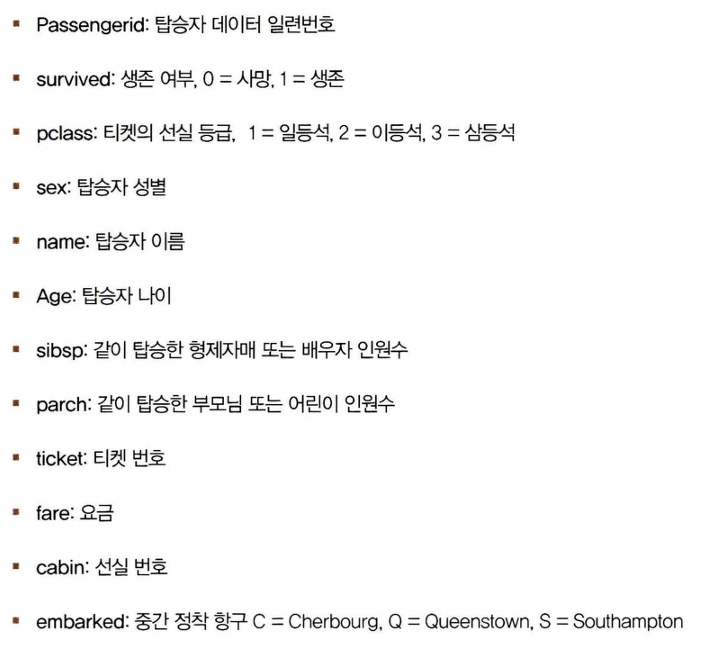

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Rangeindex : DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있음
- Rangeindex가 891entries이므로 891개의 로우로 구성
- 칼럼 수는 12개
- 2개의 칼럼이 Hoat64 타입, 5개의 칼럼이 int64 타입, 5개의 칼럼이 object 타입
- 판다스의 object 타입은 string 타입으로 봐도 무방
- 판다스는 넘파이 기반으로 만들어졌고 넘파이의 String 타입이 길이 제한이 있어서 이에 대한 구분을 위해 object 타입으로 명기한 것
- Age, Cabin, Embarked 칼럼은 각각 714개, 204개, 889개의 Not Null 값을 가지고 있으므로 각각 177개, 608개, 2개의 Null값(NaN)을 가지고 있음

- 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 함
- 여기서는 DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경
- Age의 경우는 평균 나이, 나머지 칼럼은 'N'값으로 변경
- 그다음, 모든 칼럼의 Null 값이 없는지 다시 확인

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


/tmp/ipython-input-2646065124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
/tmp/ipython-input-2646065124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


- Sex, Embarked 값은 별문제가 없으나, Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것으로 보임
- 예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건 존재
- Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임
- 왜냐하면 이 시절에는 지금보다도 부자와 가난한 사람에 대한 차별이 더 있던 시절이었기에 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이기 때문
- Cabin 속성의 경우 앞 문자만 추출

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# .str : 판다스의 문자열 벡터화 접근자
# [:1] : 각 값에서 처음 1글자만 잘라냄
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


- 첫 번째로 어떤 유형의 승객이 생존 확률이 높았는지 확인할 예정
- 제임스 카메론의 영화인 '타이타닉'에서도 나왔듯이 바다에서 사고가 날 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상
- 아마도 부자나 유명인이 다음 구조 대상이었을 것
- 안타깝게도 삼등실에 탄 많은 가난한 이는 타이타닉 호와 운명을 함께 했을 것
- 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교할 예정

In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Survived 칼럼은 레이블로서 결정 클래스 값
- Survived 0은 사망, 1은 생존
- 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았음
- 여자는 314명 중 233명으로 약 74.2%가 생존했지만, 남자의 경우에는 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존

<Axes: xlabel='Sex', ylabel='Survived'>

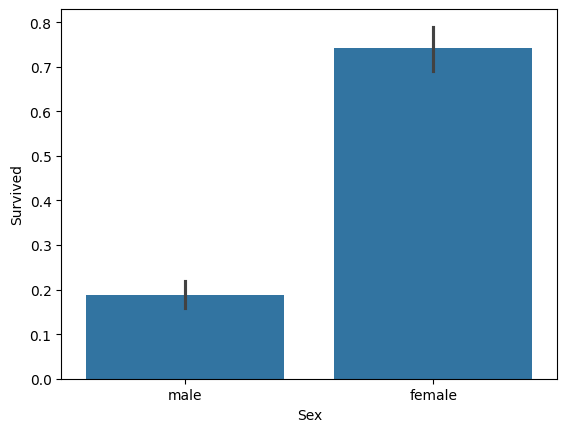

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

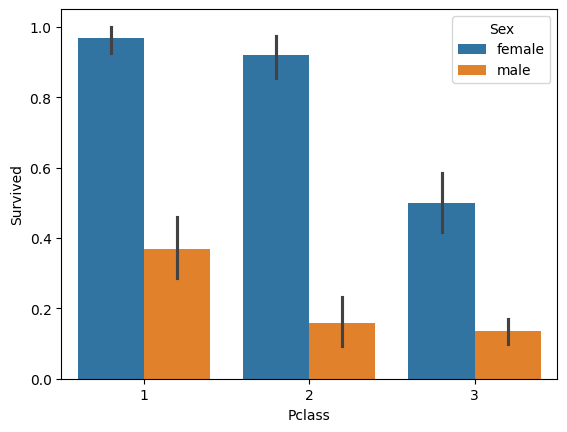

In [ ]:
# 단순히 객실 등급별로 생존 확률을 보는 것보다는 성별을 함께 고려해 분석하는 것이 더 효율적
# 객실 등급별 성별에 따른 생존 확률 표현
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐
- 남성의 경우는 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음

In [ ]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정
# DataFrame의 apply lambda 식에 사용

def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

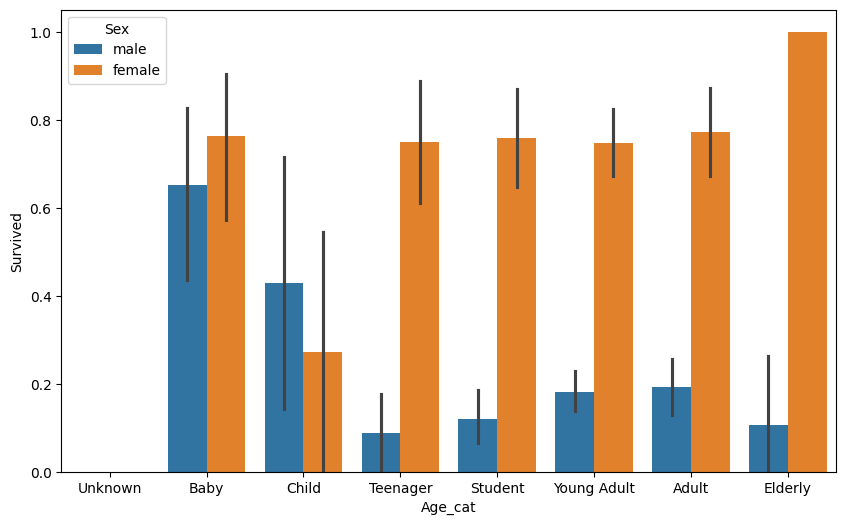

In [ ]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
# 만약 설정하지 않으면, seaborn은 알파벳 순서대로 범주 정렬
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

# 임시로 만든 Age_cat 열은 drop으로 삭제
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환
- 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit(), transform()으로 데이터를 변환
- 여러 칼럼을 encode_features() 함수를 새로 생성해 한 번에 변환

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder( )
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있음

- 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null 처리, 불필요한 피처
제거, 인코딩을 수행하는 내부 함수로 구성
- 불필요한 피처 제거는 drop_features(df)로 수행하며 머신러닝 알고리즘에 불필요한, 단순한 식별자 수준의 피처인 Passengerld, Name, Ticket 피처를 제거

In [ ]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

- 데이터 전처리를 수행하는 transform_features() 함수를 만들었으니 이 함수를 이용해 다시 원본 데이터를 가공
- 원본 CSV 파일을 다시 로딩하고 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만듦
- 그리고 Survived 속성을 드롭해 피처 데이터 세트를 만듦
- 이렇게 생성된 피처 데이터 세트에 transform_features()를 적용해 데이터를 가공

In [ ]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')

In [ ]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'],axis=1)  # Survived 열 제거

X_titanic_df = transform_features(X_titanic_df)

/tmp/ipython-input-562993125.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-562993125.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

- ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측
- 사이킷런은 결정 트리를 위해서 DecisionTreeClassifier, 랜덤 포레스트를 위해 RandomForestClassifier, 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공
- 이들 사이킷런 클래스를 이용해 train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)할 것
- 예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score() API를 사용
- DecisionTreeClassifier와 RandomForestClassifier에 생성 인자로 입력된 random_state=11은 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도일 뿐이니 실제 사례에서는 제거해도 됨
- LogisticRegression의 생성 인자로 입력된 solver=liblinear는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것
- 일반적으로 작은 데이터 세트에서의 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있음

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


- 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있음
- 아직 최적화 작업을 수행하지 않았고, 데이터양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없음


- 다음으로는 교차 검증으로 결정 트리 모델 더 평가
- 교차 검증을 위한 사이킷런 model selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용
- 먼저 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  # 폴드 세트를 5개인 kfold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits = folds)   # 데이터를 5등분 해서, 그 중 1개는 검증용, 나머지 4개는 학습용으로 쓰는 과정 반복
  scores = []

  # KFold 교차 검증 수행
  # kfold.split(X_titanic_df -> 데이터를 train, test로 나눔
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    scores.append(accuracy)   # append -> 리스트에 각 숫자를 추가
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print("평균 정확도:{0:4f}".format(mean_score))

  #### {0:.4f} → 첫 번째 값을 소수점 4자리까지 표시
  #### {1:.4f} → 두 번째 값을 소수점 4자리까지 표시

# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

### 정의된 exec_kfold의 default 값이 5등분이어도, 호출시 사용자가 folds를 덮어쓸 수 있음

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도:0.782299


교차 검증을 cross_val_score() API를 이용해 수행

In [ ]:
from sklearn.model_selection import cross_val_score

# cv = 5 : 5-Fold 교차검증을 수행하겠다는 의미
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- cross_val_score( )와 방금 전 K 폴드의 평균 정확도가 약간 다른데, 이는 cross_val_score( )가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

1.  KFold (일반 K-폴드)
- 데이터를 단순히 균등하게 나눠서 학습/검증 세트를 만듦
- 클래스(label)의 분포(0/1 비율 같은 것)는 고려하지 않음
- 예를 들어 Titanic에서 Survived (0=사망, 1=생존) 비율이 전체적으로 62:38이라면, KFold로 나눈 검증 세트는 fold1: 70:30 / fold2: 80:20 / fold3: 55:45 처럼 비율이 들쭉날쭉할 수 있음

2.  StratifiedKFold (계층적 K-폴드)
- 데이터를 나눌 때 클래스 비율을 동일하게 유지하려고 함
- Titanic 예시에서 전체 데이터의 Survived 비율이 62:38이라면, 모든 fold 안에서도 항상 62:38 비율을 최대한 맞춤
- 즉, 분류 문제에서 클래스 불균형을 방지하고, 각 fold가 원래 데이터의 분포를 더 잘 대표하게 만듦

★ cross_val_score의 기본 동작
- 회귀 문제일 때 → 그냥 KFold 사용
- 분류 문제일 때 → 자동으로 StratifiedKFold 사용
- Titanic의 Survived처럼 이진 분류에서는 기본적으로 StratifiedKFold가 적용됨
- 그래서, 내가 직접 KFold로 구현한 exec_kfold() → 클래스 비율이 fold마다 달라질 수 있음 → 평균 정확도 조금 흔들림
- cross_val_score() → StratifiedKFold로 클래스 비율을 유지함 → fold별 정확도가 더 안정적이고 평균도 약간 다를 수 있음

- 마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정
- CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정
- 최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트세트에서의 DecisionTreeClassifier 정확도: 0.8715


- max_depth : 트리의 최대 깊이
- min_samples_split : 노드를 나누기 위한 최소 샘플 수
- min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 수
- 여기서는 이 세 가지 하이퍼파라미터를 여러 값으로 조합해 보겠다는 뜻
- 조합 개수 = 4 × 3 × 3 = 36개 경우

- best_params_ : 교차검증 결과 가장 성능이 좋았던 하이퍼파라미터 조합
- best_score_ : 그때의 교차검증 평균 정확도